In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

Reading Car dataset using Pandas

In [25]:
data = pd.read_csv("Car.csv")

Data preprocessing (Converting qualitative data into quantitative)

In [26]:
data = data.replace("gas",0)
data = data.replace("diesel",1)
data = data.replace("std",0)
data = data.replace("turbo",1)
data = data.replace("two",2)
data = data.replace("four",4)
data["drivewheel"] = data["drivewheel"].replace("fwd",1)
data["drivewheel"] = data["drivewheel"].replace("rwd",2)
data["drivewheel"] = data["drivewheel"].replace("4wd",4)
data["enginelocation"] = data["enginelocation"].replace("front",0)
data["enginelocation"] = data["enginelocation"].replace("rear",1)
data["cylindernumber"] = data["cylindernumber"].replace("three",3)
data["cylindernumber"] = data["cylindernumber"].replace("five",5)
data["cylindernumber"] = data["cylindernumber"].replace("six",6)
data["cylindernumber"] = data["cylindernumber"].replace("eight",8)
data["cylindernumber"] = data["cylindernumber"].replace("twelve",12)
data = data.drop(['carbody','enginetype','fuelsystem','CarName'],axis=1)

Data Information

In [27]:
print("Dimensions of dataset are :",data.shape)
print(data.describe())

Dimensions of dataset are : (205, 22)
           car_ID   symboling    fueltype  aspiration  doornumber  drivewheel  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146    0.097561    0.180488    3.121951    1.502439   
std     59.322565    1.245307    0.297446    0.385535    0.994966    0.718279   
min      1.000000   -2.000000    0.000000    0.000000    2.000000    1.000000   
25%     52.000000    0.000000    0.000000    0.000000    2.000000    1.000000   
50%    103.000000    1.000000    0.000000    0.000000    4.000000    1.000000   
75%    154.000000    2.000000    0.000000    0.000000    4.000000    2.000000   
max    205.000000    3.000000    1.000000    1.000000    4.000000    4.000000   

       enginelocation   wheelbase   carlength    carwidth  ...  \
count      205.000000  205.000000  205.000000  205.000000  ...   
mean         0.014634   98.756585  174.049268   65.907805  ...   
std          0.120377    6.021776 

Splitting the dataset

In [28]:
X = data.iloc[:,:21]
y = data.price
X_train, X_test, ytrain, ytest = train_test_split(X, y, test_size=.25)

Heatmap for data

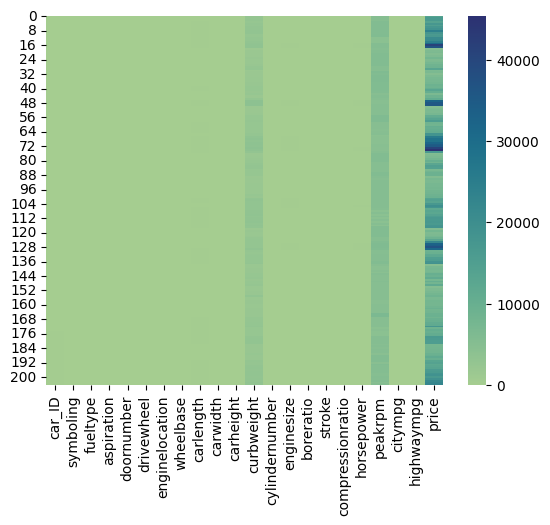

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [7]:
sns.heatmap(data,cmap='crest')
plt.show()
plt.figure(figsize=(20,8))


HIstogram for car prices

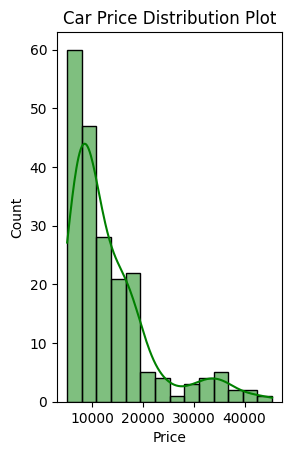

In [29]:
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(data.price,color='green',kde=True)
plt.xlabel("Price")
plt.show()

Applying Linear regresssion for predicting car price

In [30]:
model = LinearRegression()
model.fit(X_train, ytrain)
ypred = model.predict(X_test)
print("Slopes of the regression line are : \n", model.coef_)
print("Intercept of the regression line is : ", model.intercept_)

Slopes of the regression line are : 
 [-2.23071139e+01 -2.26237220e+00  1.43849235e+01  2.09615037e+02
  3.26040602e+01  1.25062668e+03  9.55296030e+03  1.23189971e+02
 -4.58883032e+00  8.61929986e+02  4.68048786e+01  2.96073473e-01
 -2.55234493e+02  1.37220426e+02 -1.85691585e+03 -3.21665212e+03
  2.07089120e+02  6.01072921e+00  1.92191672e+00 -2.99565248e+02
  3.17844083e+02]
Intercept of the regression line is :  -72479.20781265495


Coefficient of determination

In [31]:
print("Coefficient of determination is : ", r2_score(ytest,ypred))

Coefficient of determination is :  0.8354475335988196


Scatterplot showing relation between testing output & predicted output

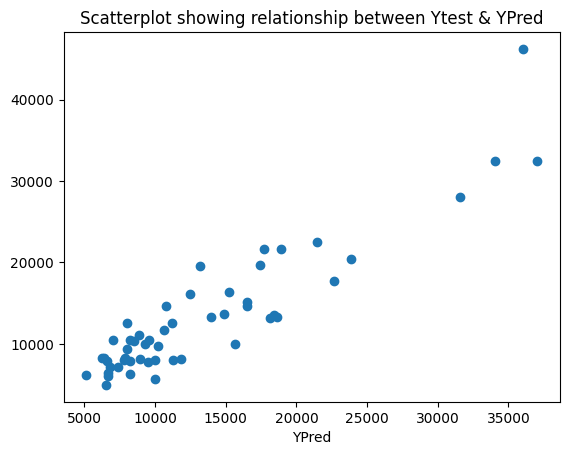

In [34]:
plt.scatter(ytest,ypred)
plt.xlabel("Ytest")
plt.xlabel("YPred")
plt.title("Scatterplot showing relationship between Ytest & YPred")
plt.show()